In [26]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, Image
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from IPython.display import SVG
from keras.models import Model, model_from_json
from keras.layers import Input, Dense, LSTM, concatenate, Reshape
from keras.utils.vis_utils import plot_model, model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam, SGD

In [37]:
def mixed_net():
    
    eq_ip = Input(shape=(100,), name='eq_ip')
    eq1 = Dense(64, activation='sigmoid')(eq_ip)
    
    disjoint_ip = Input(shape=(100,), name='disjoint_ip')
    disjoint1 = Dense(64, activation='sigmoid')(disjoint_ip)
    
    hichy_ip = Input(batch_shape=(None,1,1))
    hichy1 = LSTM(64, stateful = False)(hichy_ip)
    #hichy2 = LSTM(n_neurons, stateful = True, return_sequences=True)(hichy1)
    #hichy2 = LSTM(32, stateful = True)(hichy1)
    hichy3 = Dense(64, activation='sigmoid')(hichy1)
    
    cnct = concatenate([eq1,disjoint1,hichy1])
    
    op = Dense(1, activation='sigmoid')(cnct)
    
    model = Model(inputs=[eq_ip,disjoint_ip,hichy_ip],outputs=op)
    opt=Adam(lr=0.0001)
    l_val = "binary_crossentropy"
    #l_val = "mean_squared_error"
    #opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=l_val, optimizer=opt)
    return model
    
    

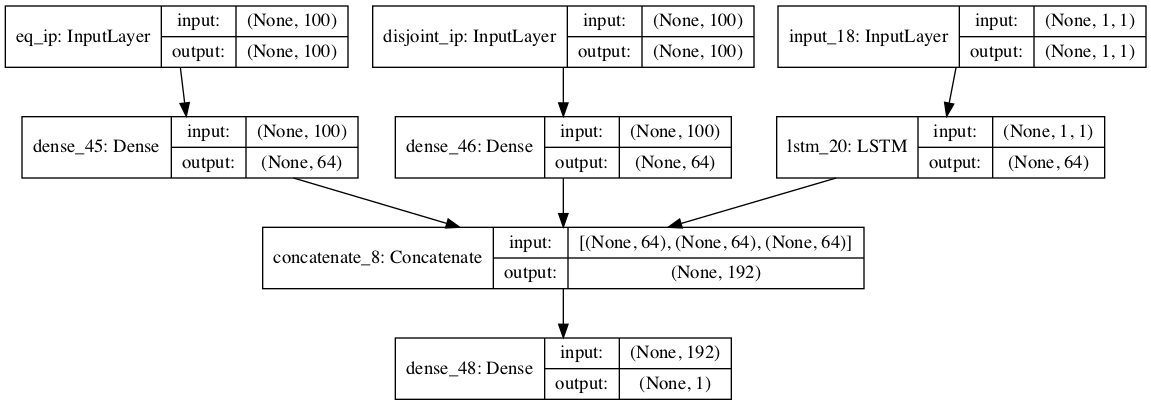

In [38]:
model = mixed_net()
#model.summary()
#SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg')) #pydot
plot_model(model, to_file='mixed_model.png', show_shapes=True)
Image(filename='mixed_model.png')